In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/wines/wine.csv', index_col = 0)

In [3]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... ".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))
print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 
There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [5]:
df[['country','description','points']].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [6]:
country_points = df.groupby('country')[['points']]
country_points = country_points.count()

In [7]:
country_points = country_points.sort_values(by = 'points', ascending = False)[:15]

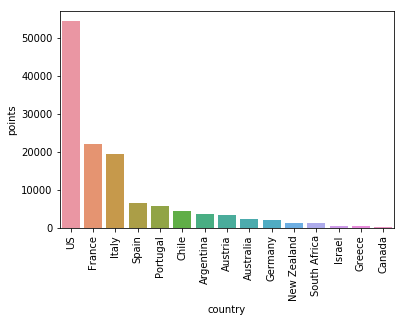

In [8]:
sns.barplot(data = country_points, x = country_points.index, y = 'points')
pylab.rcParams['figure.figsize'] = (20, 7)
plt.xticks(rotation = 90)
plt.show()

In [9]:
country_group = df.groupby('country')
country_group.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

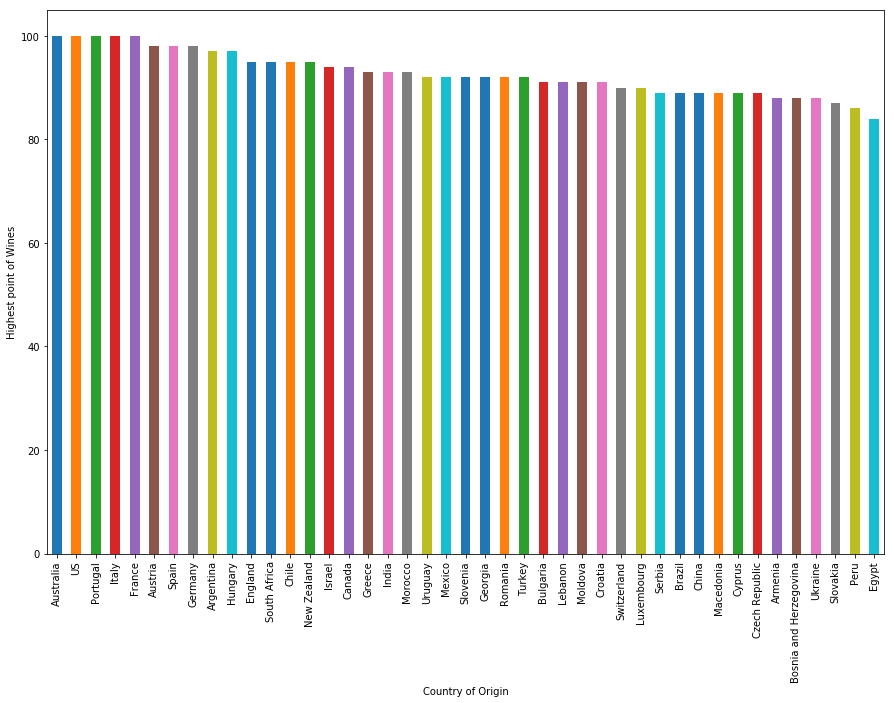

In [10]:
plt.figure(figsize=(15,10))
country_group.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [11]:
promedio_puntaje = country_group.mean()['points'].sort_values(ascending = False)

In [12]:
df_promedio_puntaje = pd.DataFrame(promedio_puntaje)

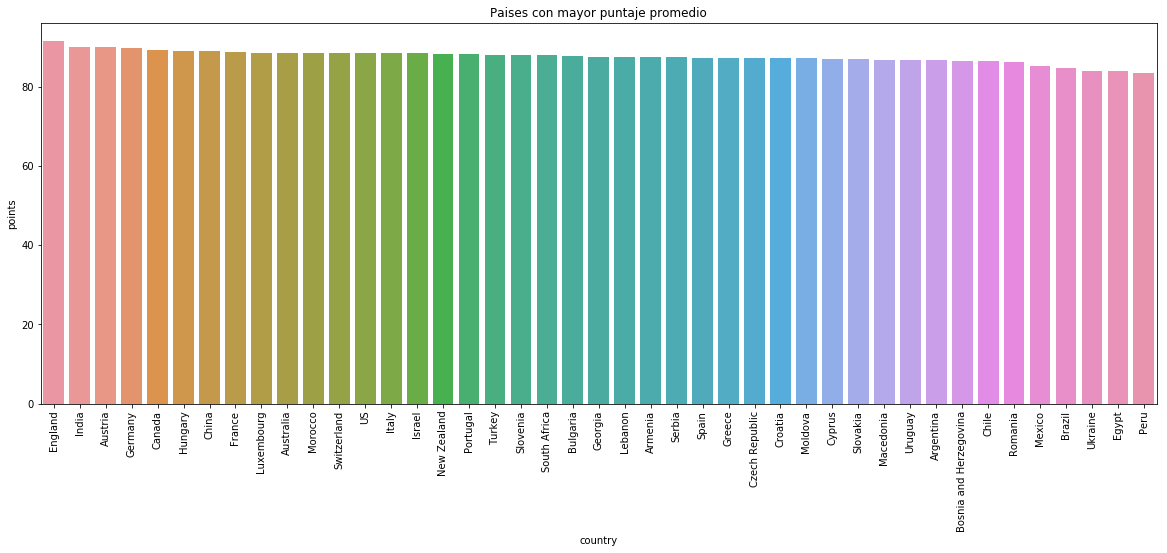

In [13]:
sns.barplot(data = df_promedio_puntaje, x = df_promedio_puntaje.index, y = 'points')
plt.xticks(rotation = 90)
plt.title('Paises con mayor puntaje promedio')
plt.show()

In [14]:
price_points = country_group.max().sort_values(by = 'points', ascending = False)[['points','price']]

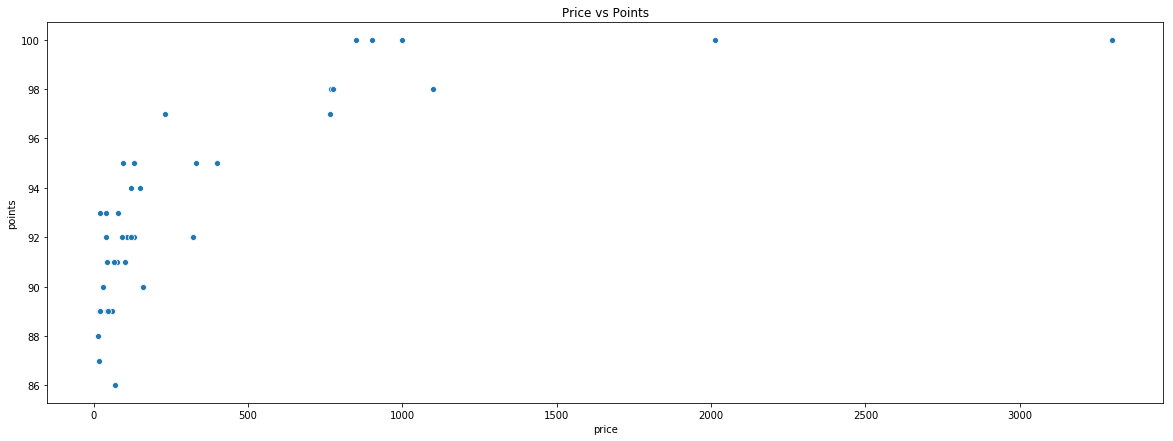

In [15]:
sns.scatterplot(data = price_points, x = 'price', y = 'points')
plt.title('Price vs Points')
plt.show()

In [16]:
text = df.description[0]

In [17]:
wordcloud = WordCloud().generate(text)

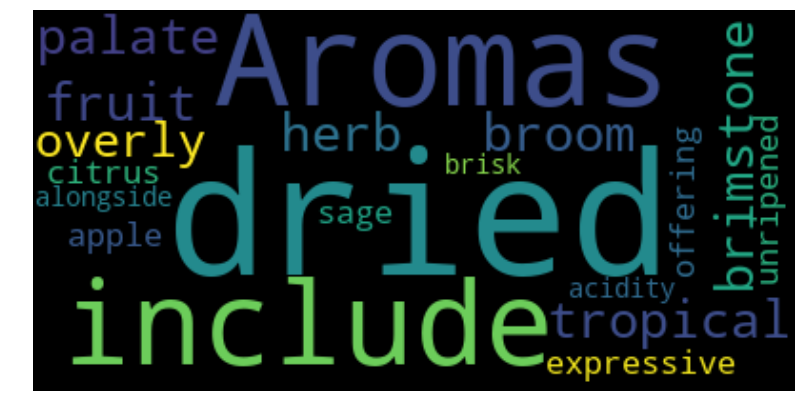

In [18]:
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

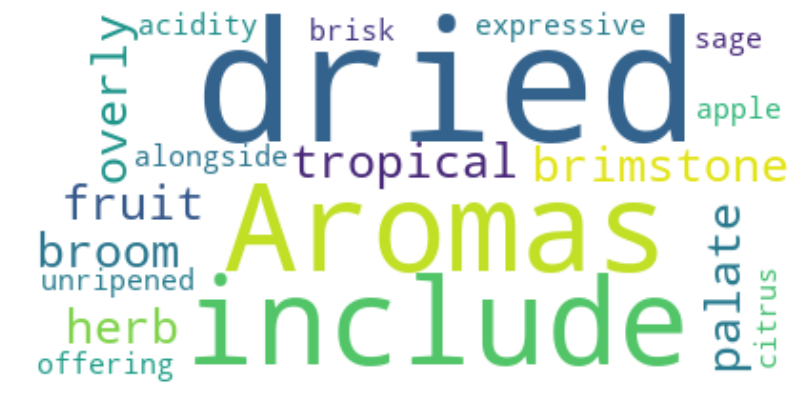

In [19]:
wordcloud = WordCloud(max_words=100, background_color = "white").generate(text)
plt.imshow(wordcloud,interpolation = 'bilinear') # Interpolation es algo así como la "calidad"
plt.axis('off')
plt.show()

In [20]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


In [21]:
stopwords = set(STOPWORDS)

In [22]:
stopwords.update(['drink', 'now', 'wine', 'flavor', 'flavors'])

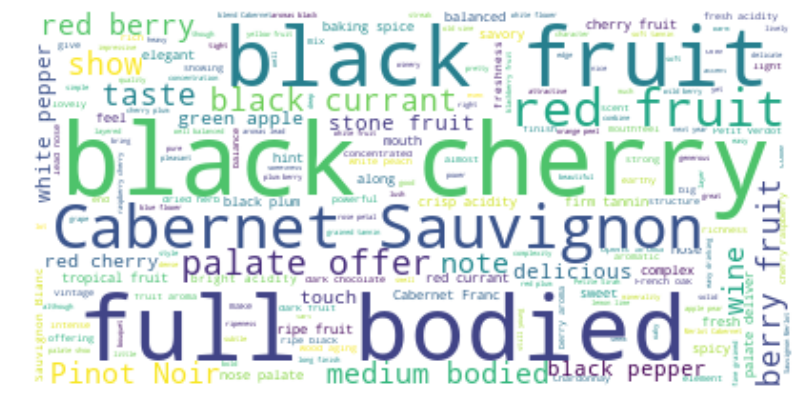

In [23]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('data/wines/wines_output/wines_wordcloud.png')
plt.show()

![texte](wine_mask.png)

In [24]:
wine_mask = np.array(Image.open("data/wines/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [26]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

In [27]:
for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [28]:
transformed_wine_mask[300]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   7,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   

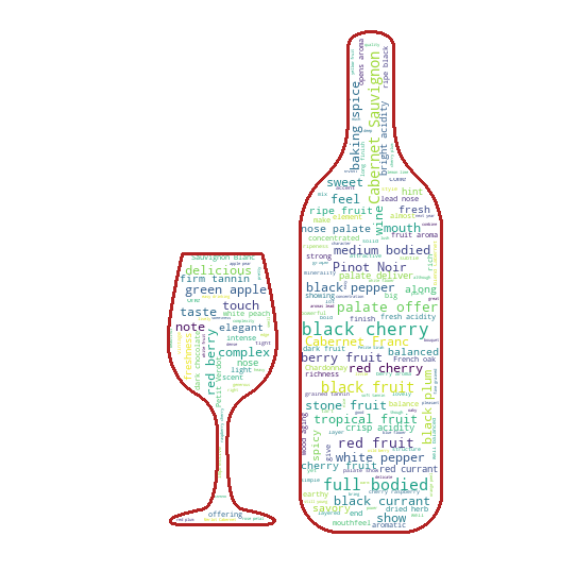

In [29]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("data/wines/wines_output/wine_bottle.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
country_group.size().sort_values(ascending = False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [31]:
usa_review = " ".join(review for review in df[df["country"]=="US"].description)
fra_review = " ".join(review for review in df[df["country"]=="France"].description)
ita_review = " ".join(review for review in df[df["country"]=="Italy"].description)
spa_review = " ".join(review for review in df[df["country"]=="Spain"].description)
por_review = " ".join(review for review in df[df["country"]=="Portugal"].description)

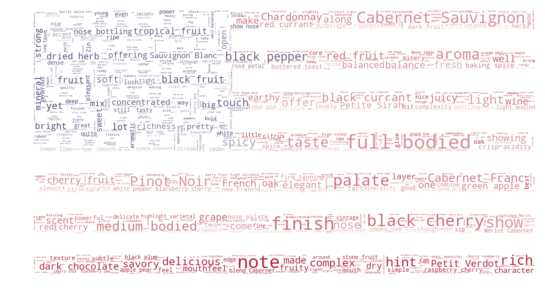

In [32]:
mask_usa = np.array(Image.open('data/wines/usa_flag.png'))
wordcloud_usa = WordCloud(stopwords = stopwords, background_color = "white", mode = "RGBA", max_words = 1000, mask = mask_usa).generate(usa_review)

# create coloring from image
image_colors = ImageColorGenerator(mask_usa)
plt.figure(figsize = [9,9])
plt.imshow(wordcloud_usa.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

# store to file
plt.savefig("data/wines/wines_output/us_wine.png", format="png")

plt.show()

In [33]:
# El mask guarda la representación matricial de la imagen, un numpy.array de (650 x 1235 x 3) (650 pixeles hacía abajo, 1235 de largo y 3 valores por posición (RGB))
print(mask_usa)
print(mask_usa.shape)

[[[ 60  59 110]
  [ 60  59 110]
  [ 60  59 110]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]

 [[ 60  59 110]
  [ 60  59 110]
  [ 60  59 110]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]

 [[ 60  59 110]
  [ 60  59 110]
  [ 60  59 110]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]

 ...

 [[178  34  52]
  [178  34  52]
  [178  34  52]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]

 [[178  34  52]
  [178  34  52]
  [178  34  52]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]

 [[178  34  52]
  [178  34  52]
  [178  34  52]
  ...
  [178  34  52]
  [178  34  52]
  [178  34  52]]]
(650, 1235, 3)


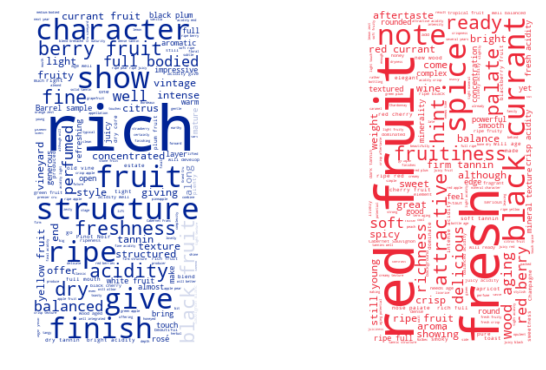

In [34]:
# Generate a word cloud image
mask_fra = np.array(Image.open("data/wines/france_flag.png"))
wordcloud_fra = WordCloud(stopwords = stopwords, background_color = "white", mode= "RGBA", max_words = 1000, mask = mask_fra).generate(fra_review)

# create coloring from image
image_colors = ImageColorGenerator(mask_fra)
plt.figure(figsize = [9,9])
plt.imshow(wordcloud_fra.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

# store to file
plt.savefig("data/wines/wines_output/france_wine.png", format="png")

#plt.show()

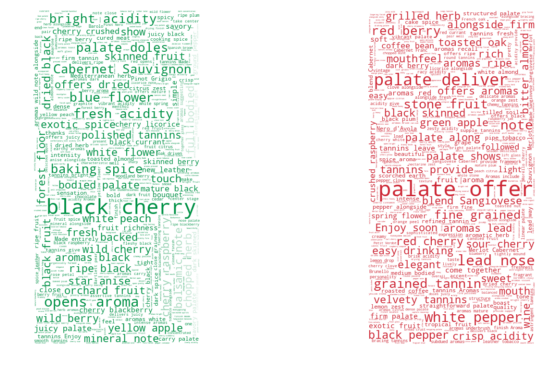

In [35]:
mask_ita = np.array(Image.open('data/wines/italy_flag.png'))
wordcloud_ita = WordCloud(stopwords = stopwords, background_color = "white", mode = "RGBA", max_words = 1000, mask = mask_ita).generate(ita_review)

# create coloring from image
image_colors = ImageColorGenerator(mask_ita)
plt.figure(figsize = [9,9])
plt.imshow(wordcloud_ita.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

# store to file
plt.savefig("data/wines/wines_output/italy_wine.png", format = "png")

plt.show()

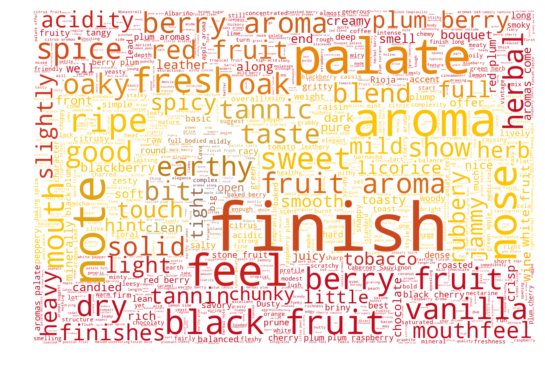

In [36]:
mask_spa = np.array(Image.open('data/wines/spain_flag.png'))
wordcloud_spa = WordCloud(stopwords = stopwords, background_color = "white", mode = "RGBA", max_words = 1000, mask = mask_spa).generate(spa_review)

# create coloring from image
image_colors = ImageColorGenerator(mask_spa)
plt.figure(figsize=[9,9])
plt.imshow(wordcloud_spa.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

# store to file
plt.savefig("data/wines/wines_output/spain_wine.png", format="png")

plt.show()

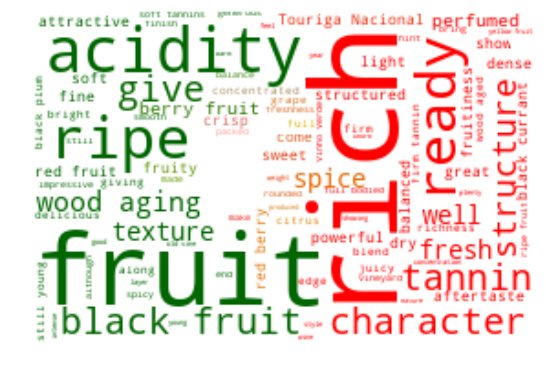

In [37]:
mask_por = np.array(Image.open("data/wines/portugal_flag.png"))
wordcloud_por = WordCloud(stopwords = stopwords, background_color = "white", mode = "RGBA", max_words=1000, mask = mask_por).generate(por_review)

# create coloring from image
image_colors = ImageColorGenerator(mask_por)
plt.figure(figsize = [9,9])
plt.imshow(wordcloud_por.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

# store to file
plt.savefig("data/wines/wines_output/portugal_wine.png", format="png")

plt.show()

In [38]:
pd.set_option('display.max_colwidth', 500)

In [39]:
wines_100 = df[df['points'] == 100].sort_values( by = 'price', ascending = False)
wines_100[['title','price','country']]

,title,price,country
111753,Château Lafite Rothschild 2010 Pauillac,1500.0,France
111755,Château Cheval Blanc 2010 Saint-Émilion,1500.0,France
122935,Château Haut-Brion 2014 Pessac-Léognan,848.0,France
114972,Quinta do Noval 2011 Nacional Vintage (Port),650.0,Portugal
89729,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),617.0,France
45781,Biondi Santi 2010 Riserva (Brunello di Montalcino),550.0,Italy
39286,Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana),460.0,Italy
42197,Casa Ferreirinha 2008 Barca-Velha Red (Douro),450.0,Portugal
118058,Verité 2007 La Muse Red (Sonoma County),450.0,US
111756,Château Léoville Las Cases 2010 Saint-Julien,359.0,France


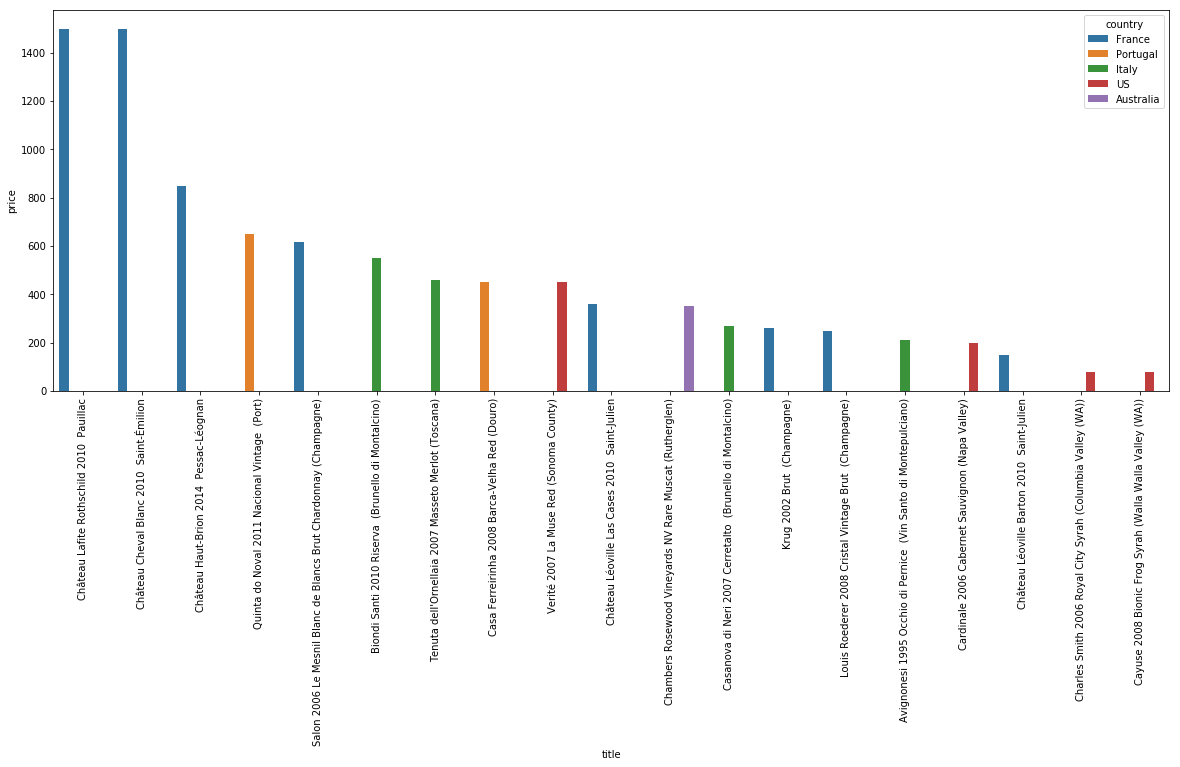

In [47]:
sns.barplot(data = wines_100, x = 'title', y = 'price', hue = 'country')
plt.xticks(rotation = 90)
plt.show()

**Conclusiones**
* Los wordclouds son una potente herramienta para analizar cuales son las palabras más relevantes dentro de un texto.
* Inglaterra es el país con el mejor promedio en cuanto al puntajes de los vinos, seguidos por India y Austria.
* Australia, Estados Unidos, Francia, Portugal e Italia tienen vinos con un puntaje de 100 / 100.
* Los tres vinos más caros son de origen francés.